# Introduction

In [ ]:
%pip install iso3166
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from iso3166 import countries
from datetime import datetime, timedelta

In [41]:
# Cargar datos
df = pd.read_csv('mission_launches.csv')

# Exploración preliminar de datos

* ¿Cuántas filas y columnas tiene?
* ¿Cuáles son los nombres de las columnas?
* ¿Hay valores NaN o duplicados?


In [100]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [101]:
df.shape

(4324, 7)

In [102]:
df.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [103]:
df.isna()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4319,False,False,False,False,False,True,False
4320,False,False,False,False,False,True,False
4321,False,False,False,False,False,True,False
4322,False,False,False,False,False,True,False


## Limpieza de datos:

- Verificar valores faltantes y duplicados
- Eliminar las columnas que contienen datos no válidos


In [108]:
clean_df = df.dropna()

## Estadísticas descriptivas

In [109]:
df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Aug 28, 1990 09:05 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [110]:
df[df["Price"].notna()]["Price"].str.replace(',', '').astype(float).describe()

,Price
count,964.000000
mean,153.792199
std,288.450732
min,5.300000
25%,40.000000
50%,62.000000
75%,164.000000
max,5000.000000


## Número de lanzamientos por empresa

- Crea un gráfico que muestre el número de lanzamientos de misiones espaciales por organización.

<Axes: xlabel='Organisation'>

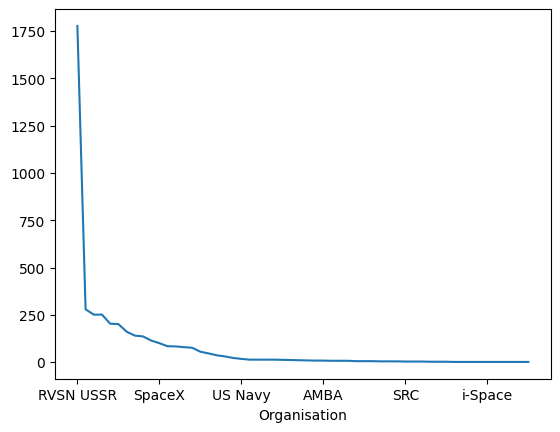

In [111]:
df["Organisation"].value_counts().plot()

## Número de cohetes activos y retirados

* ¿Cuántos cohetes están activos en comparación con los que están fuera de servicio?

In [112]:
df["Rocket_Status"].value_counts()

,count
Rocket_Status,
StatusRetired,3534
StatusActive,790


<Axes: ylabel='Rocket_Status'>

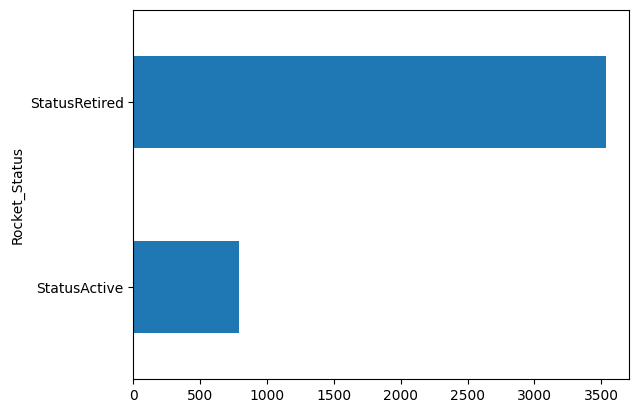

In [113]:
df["Rocket_Status"].value_counts().sort_values().plot(kind="barh")

# Distribución del estado de la misión

* ¿Cuántas misiones tuvieron éxito?
* ¿Cuántas misiones fracasaron?


In [114]:
df["Mission_Status"].value_counts()

,count
Mission_Status,
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


In [115]:
df.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879



# Analizar la cantidad total de dinero gastado por la organización en misiones espaciales

In [144]:
money_spent = df[df["Price"].notna()]
money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()

,Organisation,Price
0,Arianespace,16345.00
1,Boeing,1241.00
2,CASC,6340.26
3,EER,20.00
4,ESA,37.00


# Analizar la cantidad de dinero gastada por la organización por lanzamiento



In [145]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

,Organisation,Price
0,Arianespace,170.260417
1,Boeing,177.285714
2,CASC,40.128228
3,EER,20.000000
4,ESA,37.000000


# Grafica el número de lanzamientos por año

In [151]:
df['date'] = pd.to_datetime(
    df['Date'],
    errors='coerce',
    utc=True,
    infer_datetime_format=True
)

df['year'] = df['date'].dt.year

ds = df['year'].value_counts().reset_index()
ds.columns = ['year', 'count']

fig = px.bar(
    ds,
    x='year',
    y='count',
    orientation='v',
    title='Missions number by year'
)
fig.show()

/tmp/ipython-input-3961821388.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(


# Graficar el número de lanzamientos mes a mes hasta la fecha

* ¿Qué mes ha registrado el mayor número de lanzamientos de todos los tiempos? Superponga un promedio móvil al gráfico de series temporales mes a mes.


In [158]:
import plotly.express as px

df['date'] = pd.to_datetime(
    df['Date'],
    errors='coerce',
    utc=True
)

df['month'] = df['date'].dt.month

ds = df['month'].value_counts().reset_index()
ds.columns = ['month', 'count']

fig = px.bar(
    ds,
    x='month',
    y='count',
    title='Missions number by month'
)

fig.show()

# Lanzamientos por mes

* ¿Cuáles son los meses más y menos populares para los lanzamientos?
* ¿Qué época del año parece ser la mejor para las misiones espaciales?

In [175]:
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 430


,0
month,12.0
count,430.0


In [176]:
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 265


,0
month,1.0
count,265.0


# ¿Cómo ha variado el precio de lanzamiento a lo largo del tiempo?

* Crea un gráfico de líneas que muestre el precio promedio de los lanzamientos de cohetes a lo largo del tiempo.


<Axes: xlabel='year'>

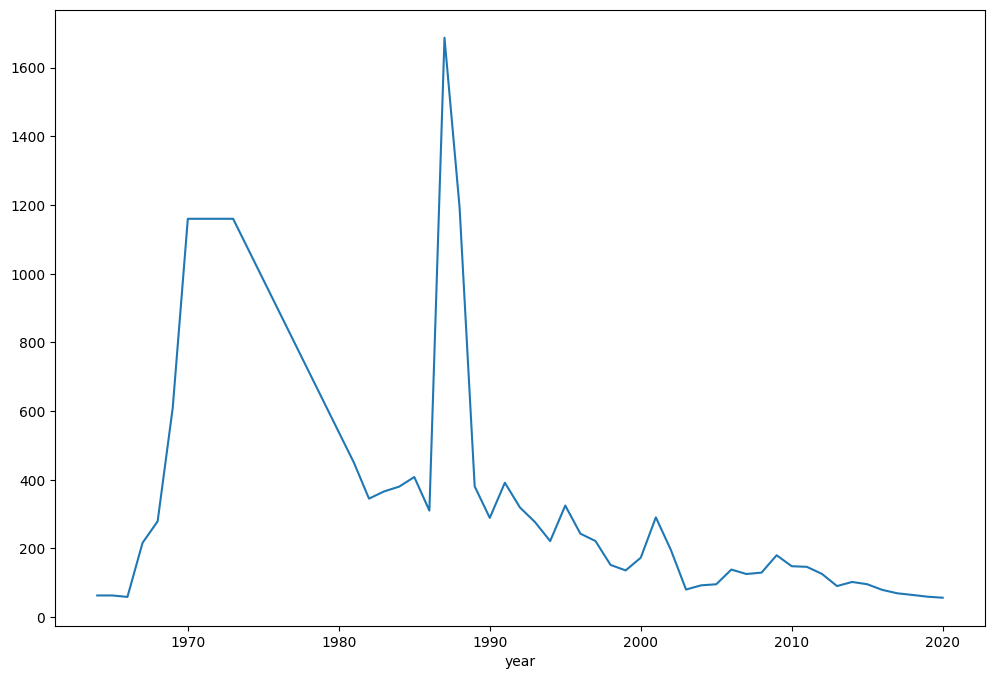

In [179]:

avg_price = df[df["Price"].notna()]
pd.options.mode.chained_assignment = None
avg_price["Price"] = avg_price["Price"].str.replace(',', '').astype(float)
avg_price.groupby("year")["Price"].mean().plot(figsize=(12, 8))

# Graficar el número de lanzamientos a lo largo del tiempo de las 10 principales organizaciones.

* ¿Cómo ha cambiado el dominio de los lanzamientos a lo largo del tiempo entre las diferentes empresas?

In [190]:
# Obtener las 10 organizaciones con más misiones
top10_names = df['Organisation'].value_counts().head(10).index
top_10 = df[df['Organisation'].isin(top10_names)]
top_10_sorted = top_10.sort_values(by=["Organisation", "Date"], ascending=[True, False])

fig = px.histogram(
    top_10_sorted,
    x="Organisation",
    nbins=10,
    title="Top 10 Organisations – Number of Missions"
)
fig.show()

## Crea un gráfico que muestre el número total de lanzamientos año tras año por parte de las dos superpotencias

<Axes: xlabel='year'>

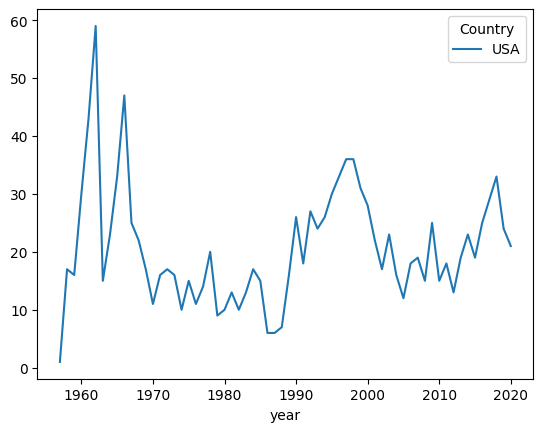

In [195]:
Or_df = df[(df['Country']=='USA') | (df['Country']=='RUS')]
Or_df.groupby(["year", "Country"]).size().unstack().plot()

## Grafique el número total de fracasos de misión año tras año.

In [196]:
Or_df = df[df['Mission_Status'].str.contains("Failure")]
Or_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,China,2020-07-10 04:17:00+00:00,2020.0,7.0
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,New Zealand,2020-07-04 21:19:00+00:00,2020.0,7.0
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,2020-05-25 19:50:00+00:00,2020.0,5.0
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,China,2020-04-09 11:46:00+00:00,2020.0,4.0
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,China,2020-03-16 13:34:00+00:00,2020.0,3.0


In [198]:
Or_df_clean = Or_df.dropna(subset=['year'])

fig = px.sunburst(
    Or_df_clean,
    path=["year", "Mission_Status"],
    title="Mission Status per Year"
)
fig.show()

## Representar gráficamente el porcentaje de fracasos a lo largo del tiempo

* ¿Aumentaron o disminuyeron los fracasos con el tiempo?
* ¿Los países mejoraron su capacidad para minimizar el riesgo y aumentaron sus posibilidades de éxito con el tiempo?

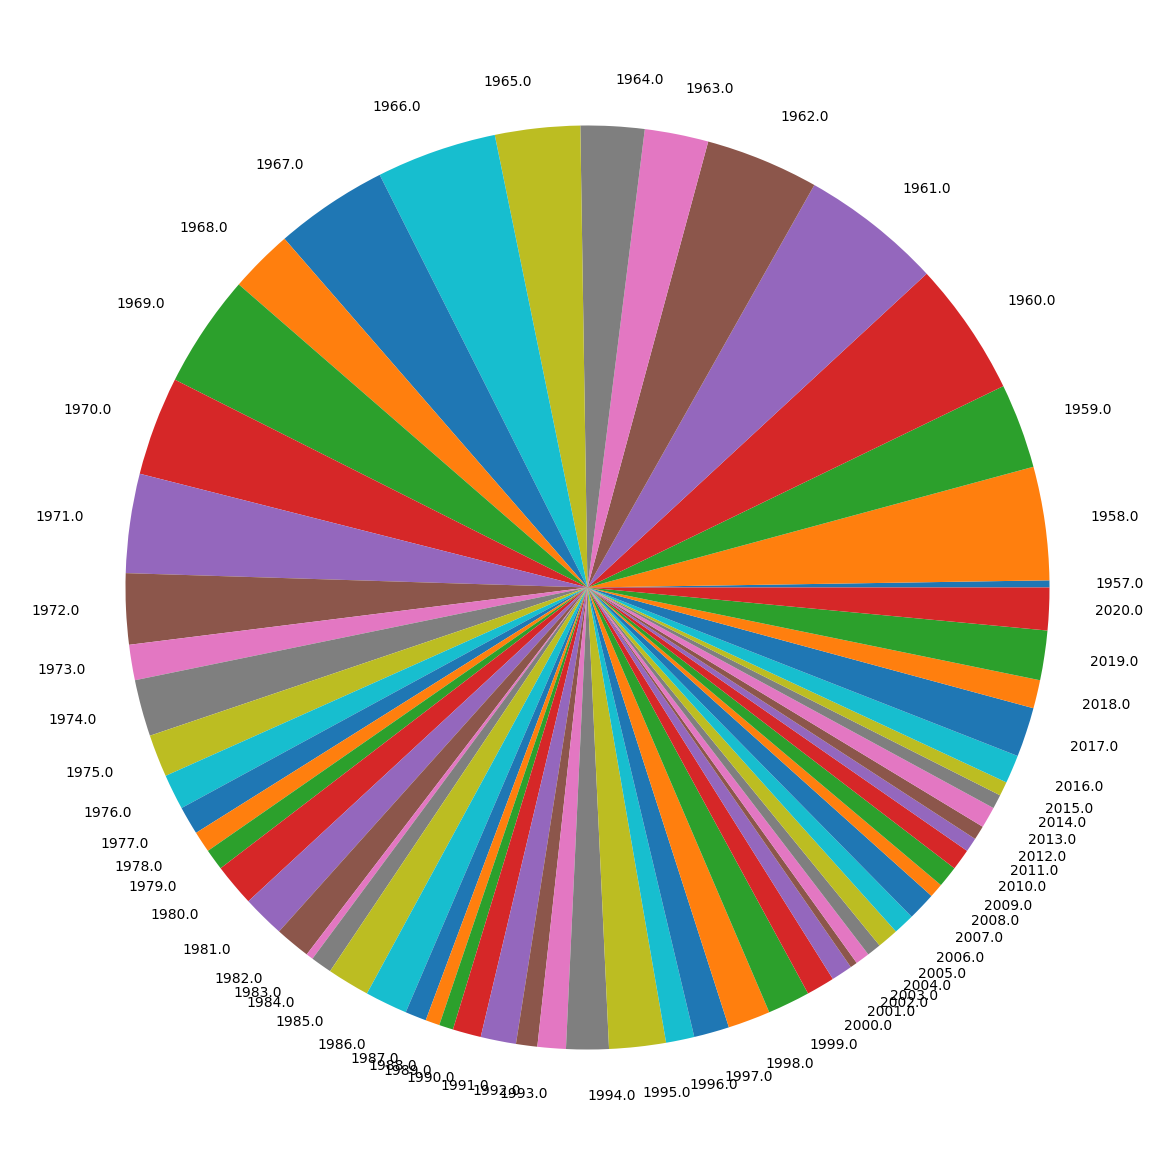

In [199]:
grouping = Or_df.groupby("year").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['year']

plt.pie(sizes, labels = labels)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

# Para cada año, indique qué país lideró en número total de lanzamientos hasta 2020

* ¿Cambian los resultados si solo consideramos el número de lanzamientos exitosos?


In [202]:
country_launches = df.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()

,year,Country,counts
0,1957.0,Kazakhstan,2
1,1957.0,USA,1
2,1958.0,USA,17
3,1958.0,Kazakhstan,5
4,1959.0,USA,16


# Crea un gráfico interanual que muestre la organización con mayor número de lanzamientos.

* ¿Qué organización dominó en las décadas de 1970 y 1980?
* ¿Qué organización dominó en 2018, 2019 y 2020?


In [203]:
org_launches = df.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')

org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches.head()

,year,Organisation,counts
0,1957.0,RVSN USSR,2
1,1957.0,US Navy,1
2,1958.0,AMBA,7
3,1958.0,US Navy,6
4,1958.0,RVSN USSR,5


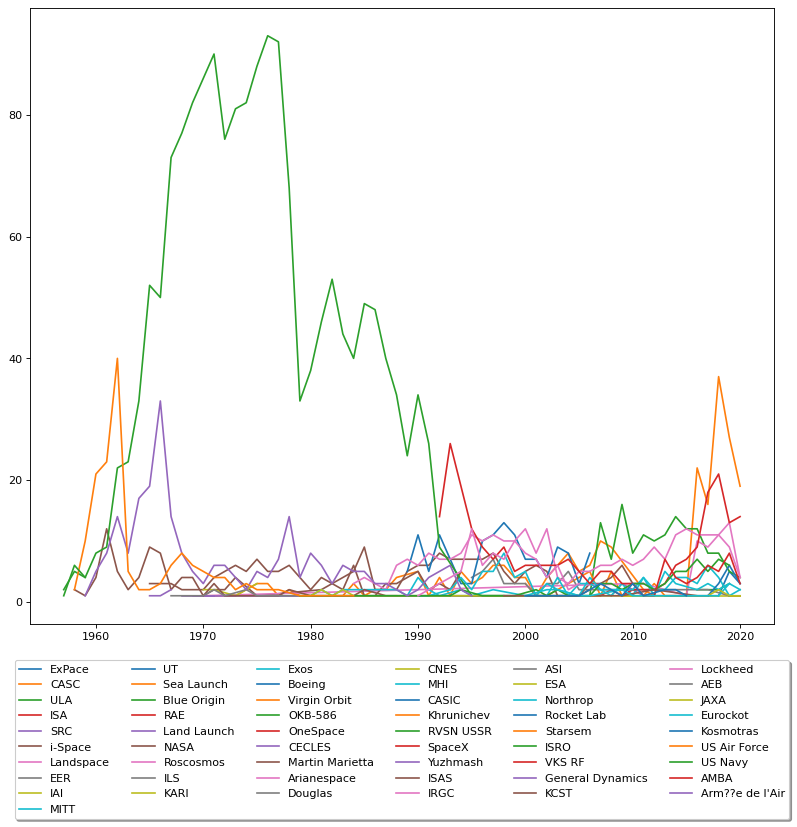

In [204]:
org_launches = df.groupby(["Organisation", "year"]).size().reset_index(name="counts")
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)

for org in org_set:
    selected_data = org_launches.loc[org_launches['Organisation'] == org]
    plt.plot(selected_data['year'], selected_data['counts'], label=org)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    fancybox=True,
    shadow=True,
    ncol=6
)

plt.show()